# Homework 1

Guanzhuo Qiao (10442266)

We generate two data sets from the two functions, and fit the data by different methods.

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from random import random


def create_dataset_00():
    Centers = [
        (0,0),
        (1,1),
        (2,1),
        (1,3)
    ]
    Centers = np.array(Centers)
    Points = []
    for center in Centers:
        var = np.array([[1,.5], [0,2]])
        Points.append(
            np.random.multivariate_normal(
                center,
                0.05*var,
                100
            )
        )
    Points = np.vstack(Points)
    return Points


def create_dataset_01():
    def line0(x):
        return (x, 10 - x ** 2 + (random() - 0.5))

    Points = []
    for _ in range(1000):
        x = 5 * (random() - 0.5)
        point = line0(x)
        Points.append(point)

    def line1(x):
        return (x, 5 * random() + ((x) * (x - 8)) + 5)

    for _ in range(1000):
        x = 5 * (random() + .1)
        point = line1(x)
        Points.append(point)

    Points = np.array(Points)
    return np.vstack(
        [
            Points,
            np.random.multivariate_normal((5, 5), [[1, 0], [0, 1]], 100)
        ])

In [101]:
from sklearn.cluster import KMeans, DBSCAN
np.random.seed(100)
sample_points0 = create_dataset_00()
sample_points1 = create_dataset_01()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: covariance is not symmetric positive-semidefinite.


For data set 1, first of all, we plot the scatter plot to see the certian pattern.

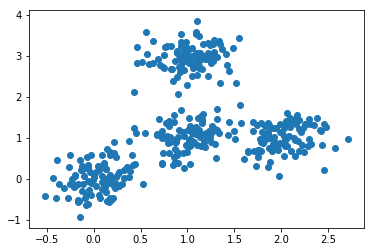

In [102]:
# Dataset 1 
plt.scatter(sample_points0[:,0], sample_points0[:,1])
plt.show()

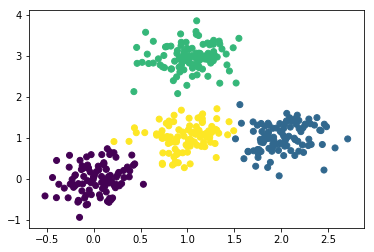

In [103]:
# For dataset 1, we use three different methods to fit the data.
# KMeans
y_pred_km_1 = KMeans(n_clusters=4).fit_predict(sample_points0)
plt.scatter(sample_points0[:, 0], sample_points0[:, 1], c=y_pred_km_1)

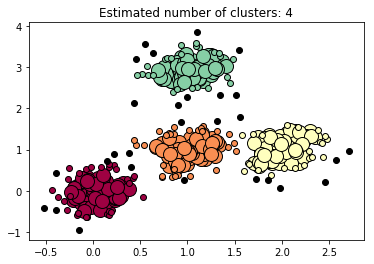

In [104]:
# DBScan
db_1 = DBSCAN(eps=0.3, min_samples=20).fit(sample_points0)
core_samples_mask = np.zeros_like(db_1.labels_, dtype=bool)
core_samples_mask[db_1.core_sample_indices_] = True
labels = db_1.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = sample_points0[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = sample_points0[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

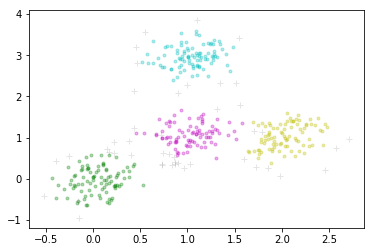

In [105]:
# OPTICS
from sklearn.cluster import OPTICS, cluster_optics_dbscan
clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)
clust.fit(sample_points0)
labels = cluster_optics_dbscan(reachability=clust.reachability_,
                                core_distances=clust.core_distances_,
                                ordering=clust.ordering_, eps=0.4)
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = sample_points0[labels == klass]
    plt.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
plt.plot(sample_points0[labels == -1, 0], sample_points0[labels == -1, 1], 'k+', alpha=0.1)

For data set 2, we still need to draw the scatter plot to see the certian pattern.

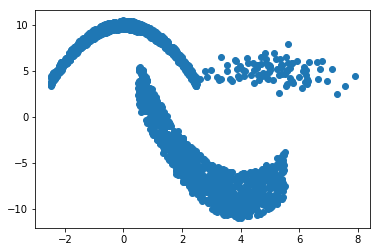

In [106]:
# Data set 2
plt.scatter(sample_points1[:,0], sample_points1[:,1])
plt.show()

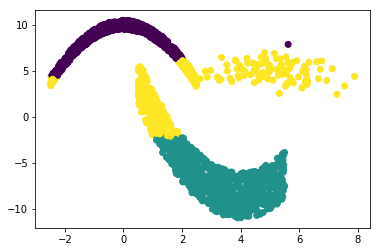

In [107]:
# KMeans
y_pred_km_2 = KMeans(n_clusters=3).fit_predict(sample_points1)
plt.scatter(sample_points1[:, 0], sample_points1[:, 1], c=y_pred_km_2)

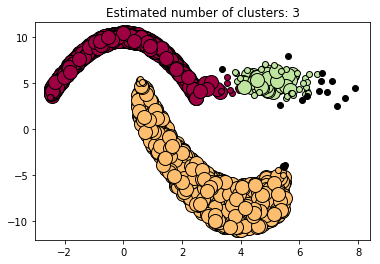

In [108]:
# DBScan
db_2 = DBSCAN(eps=0.9, min_samples=20).fit(sample_points1)
core_samples_mask = np.zeros_like(db_2.labels_, dtype=bool)
core_samples_mask[db_2.core_sample_indices_] = True
labels = db_2.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = sample_points1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = sample_points1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

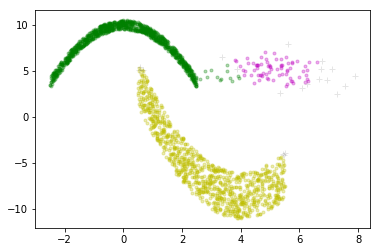

In [109]:
# OPTICS
from sklearn.cluster import OPTICS, cluster_optics_dbscan
clust = OPTICS(min_samples=20, xi=.05, min_cluster_size=.05)
clust.fit(sample_points1)
labels = cluster_optics_dbscan(reachability=clust.reachability_,
                                core_distances=clust.core_distances_,
                                ordering=clust.ordering_, eps=0.9)
colors = ['g.', 'm.', 'y.']
for klass, color in zip(range(0, 3), colors):
    Xk = sample_points1[labels == klass]
    plt.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
plt.plot(sample_points1[labels == -1, 0], sample_points1[labels == -1, 1], 'k+', alpha=0.1)

Use Tensorflow to fit the data set 1.

In [99]:
# Use the Tensorflow to classify the first data set which is labeled by KMean
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
#feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
model = tf.keras.Sequential([
  tf.keras.Input(shape=(2,), name='digits'),
  layers.Dense(10, activation='relu'),
  layers.Dense(4, activation='softmax', name='predictions')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'],
              run_eagerly=True)

model.fit(sample_points0,y_pred_km_1,
          epochs=50)

Train on 400 samples
Epoch 1/50
400/400 [==============================] - 0s 247us/sample - loss: 2.0359 - accuracy: 0.2725
Epoch 2/50
400/400 [==============================] - 0s 219us/sample - loss: 1.9347 - accuracy: 0.3100
Epoch 3/50
400/400 [==============================] - 0s 224us/sample - loss: 1.8416 - accuracy: 0.3125
Epoch 4/50
400/400 [==============================] - 0s 227us/sample - loss: 1.7587 - accuracy: 0.3075
Epoch 5/50
400/400 [==============================] - 0s 220us/sample - loss: 1.6812 - accuracy: 0.3050
Epoch 6/50
400/400 [==============================] - 0s 217us/sample - loss: 1.6022 - accuracy: 0.3075
Epoch 7/50
400/400 [==============================] - 0s 219us/sample - loss: 1.5238 - accuracy: 0.3050
Epoch 8/50
400/400 [==============================] - 0s 224us/sample - loss: 1.4510 - accuracy: 0.2975
Epoch 9/50
400/400 [==============================] - 0s 224us/sample - loss: 1.3838 - accuracy: 0.2925
Epoch 10/50
400/400 [======================

In conclusion, for the traditional method, after several trying, I find the optics may produce better performance. The tensorflow method can produce almost 94% accuracy in the training set. 